# Figure 4

Mean normalized standard deviation on A) monthly, B) sub-decadal, and C) decadal time scales across the 100 ensemble members with global average shown in white. Color indicates the percentage by which the reconstruction over or under-estimates the variability.  averaged within three regions delineated by latitude for each of the 100 ensemble members and displayed as a box plot on D) monthly, E) sub-decadal, and F) decadal time scales

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.print_figure_kwargs = {'dpi':300, 'bbox_inches': 'tight'}
import numpy as np
import pandas as pd
import xarray as xr
import xarray.ufuncs as xu
import cmocean as cm
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

In [27]:
%run _define_model_class.ipynb
%run _define_plotting_class.ipynb

In [28]:
dir_raw = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/raw/'
dir_clean = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean/'
dir_figs = '/local/data/artemis/workspace/gloege/SOCAT-LE/results/figures_MS'

In [29]:
ds_stats = xr.open_mfdataset(f'{dir_clean}/CO2_flux_stats/stats_FCO2_*_SOMFFN.nc', 
                             combine='nested',
                             concat_dim='ensemble')

In [30]:
#print(plt.style.available)

# ABC Normalized Standard deviation

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


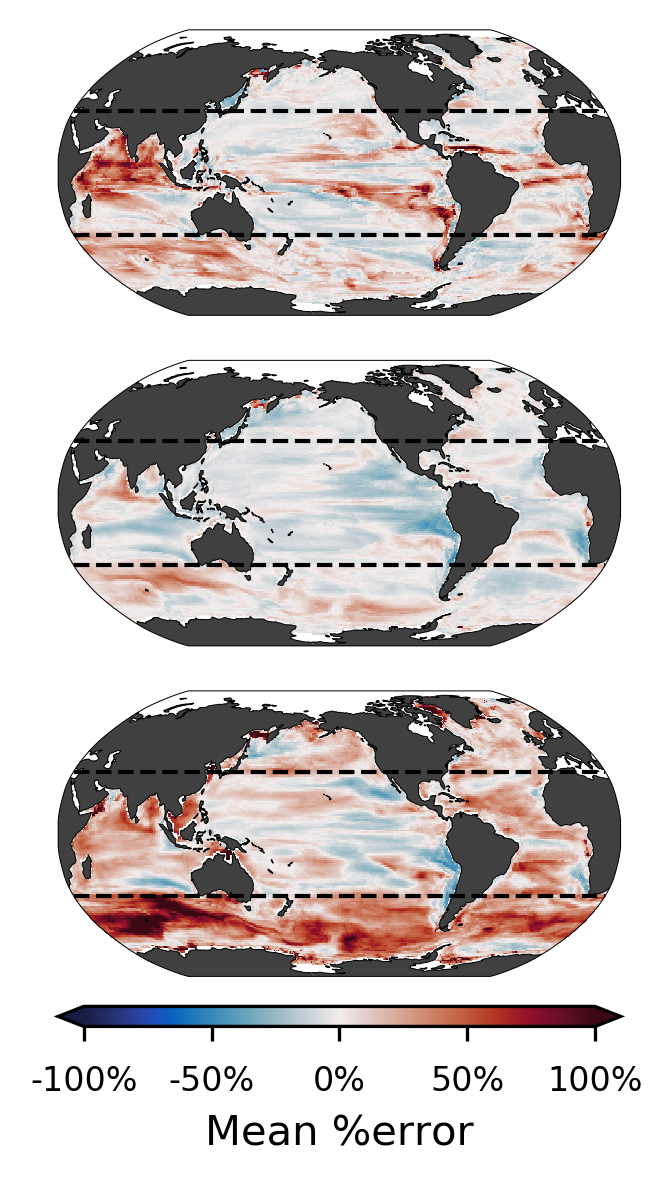

In [46]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(dpi=300) 
    worldmap = SpatialMap2(fig=fig, region='world', 
                   cbar_mode='edge',
                   axes_pad=0.15,
                   colorbar=True,
                   cbar_location='bottom',
                   nrows_ncols=[3,1])
    
    # Colorbar ranges
    vrange_col1 = [-100, 100, 50]
    cmap_col1 = cm.cm.balance
    
    
    ##-----------------------------------------------------
    ## Ensemble mean
    ##-----------------------------------------------------
    # Correlation - Annual-variation
    data = (ds_stats['std-star_seasonal']*100).mean('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub0 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=0)    
    
    # Correlation - sub-decadal
    data = (ds_stats['std-star_residual']*100).mean('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub2 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data, 
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=1)
    
    # Correlation - decadal
    data = (ds_stats['std-star_dec']*100).mean('ensemble')
    data = xr_add_cyclic_point(data, cyclic_coord='lon')
    sub4 = worldmap.add_plot(lon=data['lon'], lat=data['lat'], data=data,
                            vrange=vrange_col1[0:2], cmap=cmap_col1, ax=2)
    
    #worldmap.set_title(f'SOMFFN/{model}', ax=0)
    # add colorbar
    col = worldmap.add_colorbar(sub0, ax=0, extend='both')
    worldmap.set_cbar_xlabel(col, f'Mean %error', fontsize=10)
    worldmap.set_ticks(col, vrange_col1[0], vrange_col1[1], vrange_col1[2])
    #worldmap.set_cbar_xticklabels(col1, ['-100%', '-75%', '-50%', '-25%' ,
    #                               '0%' , '25%', '50%', '75%','100%'])
    worldmap.set_cbar_xticklabels(col, ['-100%', '-50%', '0%', '50%', '100%'])    
    
    for ax in [0,1,2]:
        worldmap.grid[ax].plot([-180, 180], [35, 35], 'k--', linewidth=1, transform=ccrs.PlateCarree())
        worldmap.grid[ax].plot([-180, 180], [-35, -35], 'k--',  linewidth=1, transform=ccrs.PlateCarree())
        
    col.ax.tick_params(labelsize=8)
#fig.savefig(f'{dir_figs}/correlation-map.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

## Global averages

In [60]:
ds_stats['std-star_dec'].mean('ensemble').stack(z=['lon','lat']).dropna('z').to_dataframe().describe()

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


,std-star_dec
count,33776.000000
mean,0.211110
std,0.321038
min,-0.557999
25%,0.032052
50%,0.166649
75%,0.343414
max,31.745502


In [59]:
-1e-1

-0.1

In [53]:
ds_stats['std-star_dec'].mean('ensemble').stack(z=['lon','lat']).dropna('z').to_dataframe().describe()

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


,std-star_dec
count,33776.000000
mean,0.211110
std,0.321038
min,-0.557999
25%,0.032052
50%,0.166649
75%,0.343414
max,31.745502


In [31]:
data = ds_stats['bias'].mean(dim='ensemble')
print(f"global average : {np.array_str(data.mean(['lon','lat']).values)} +/-\
 {np.array_str(data.std(['lon','lat']).values)}")

global average : -0.02364063920093855 +/- 0.16429760692532402


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [37]:
print(ds_stats['std-star_seasonal'].mean('ensemble').mean(['lat','lon']).values)

0.06899663385514637


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [43]:
ds_stats['std-star_seasonal'].sel(lat=slice(-35,35)).mean(['lat','lon']).dropna('ensemble').to_dataframe().describe()

,std-star_seasonal
count,100.000000
mean,0.084191
std,0.055207
min,0.006887
25%,0.038681
50%,0.068187
75%,0.120572
max,0.184286


In [44]:
ds_stats['std-star_seasonal'].sel(lat=slice(-90,-35)).mean(['lat','lon']).dropna('ensemble').to_dataframe().describe()

,std-star_seasonal
count,100.000000
mean,0.072314
std,0.049384
min,-0.015312
25%,0.029828
50%,0.079803
75%,0.109651
max,0.192491


In [25]:
print(ds_stats['std-star_residual'].mean('ensemble').mean(['lat','lon']).values)

-0.01448094374866982


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [33]:
print(ds_stats['std-star_dec'].mean(['ensemble','lat','lon']).values)

0.21157489711622243


In [6]:
out = ds_stats['std-star_residual'].mean('ensemble').stack(z=['lat','lon'])

In [20]:
df = out.to_dataframe()

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [21]:
df.head()

std-star_residual
lat   lon                   
-89.5 0.5                NaN
      1.5                NaN
      2.5                NaN
      3.5                NaN
      4.5                NaN

In [14]:
df['std-star_residual'.dropna().describe()

count    33776.000000
mean        -0.014481
std          0.111185
min         -0.488068
25%         -0.071560
50%         -0.021976
75%          0.037286
max          1.336801
Name: std-star_residual, dtype: float64

# DEF Box plots

## Monthly Variability

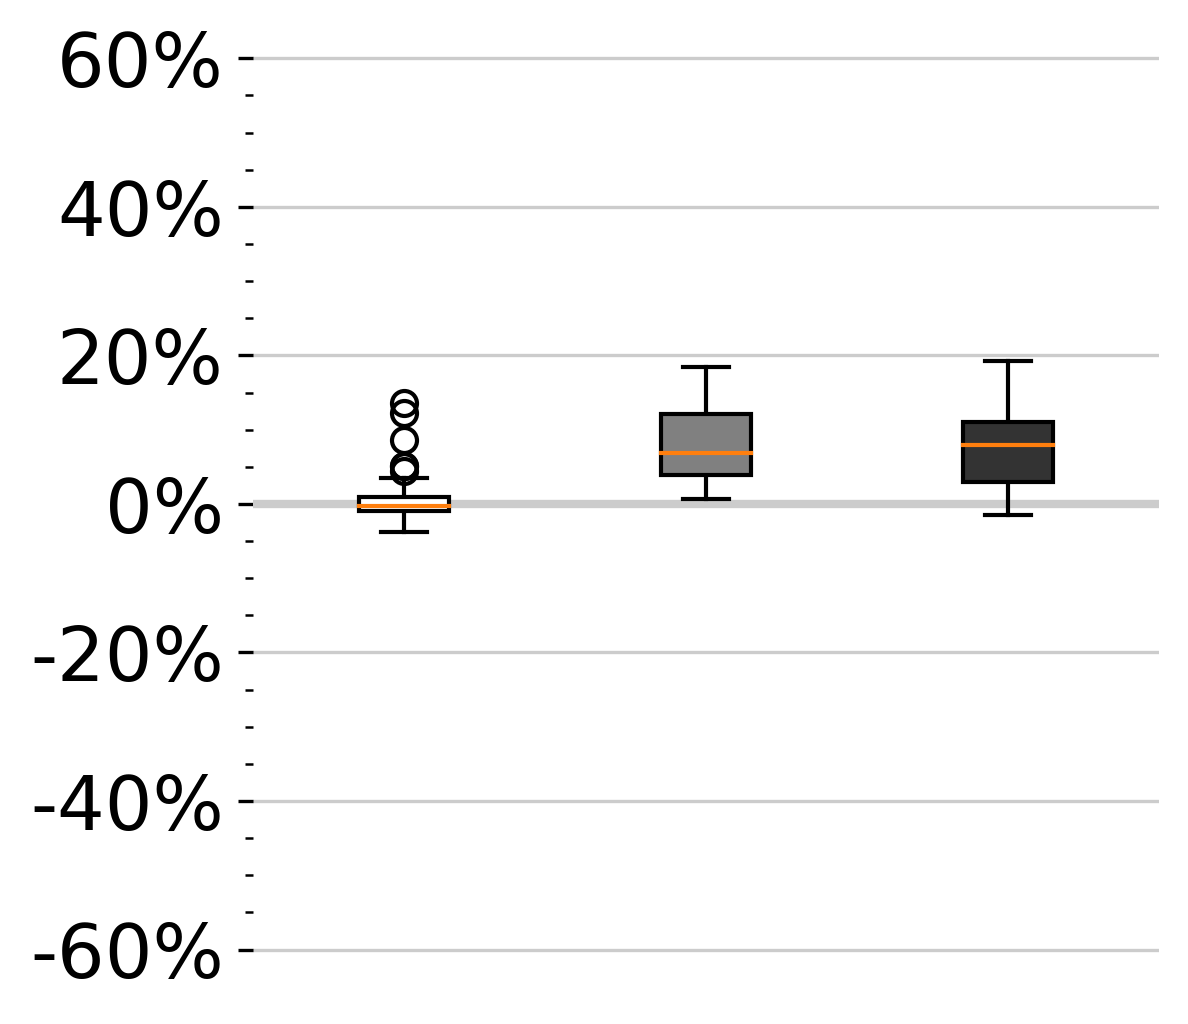

In [59]:
## Statistic to box plot
statistic = 'std-star_seasonal'

## Mean over lat/lon regions
data1 = (ds_stats[statistic]*100).sel(lat=slice(35,90)).mean(['lat', 'lon'])
data2 = (ds_stats[statistic]*100).sel(lat=slice(-35,35)).mean(['lat', 'lon'])
data3 = (ds_stats[statistic]*100).sel(lat=slice(-90,-35)).mean(['lat', 'lon'])

## Put data into list
data = [data1, data2, data3]


####################################################################################

#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

ax.plot([0.5, 3.5],[0,0],color=[0.8,0.8,0.8], linewidth=2)
box = ax.boxplot(data, patch_artist=True)

#box = plt.boxplot(df, patch_artist=True)
 
colors = [[1,1,1], [0.5,0.5,0.5], [0.2,0.2,0.2]]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
#ax.set_xticklabels([r'>35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'35$\hspace{-0.2}^\circ \hspace{-0.2}$S-35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'<35$\hspace{-0.2}^\circ \hspace{-0.2}$S'], fontsize=12)

ax.set_xticklabels([r'', r'', r''])

ax.set_ylim([-61, 61])
ax.set_yticks(np.arange(-60, 70, 20))
ax.set_yticklabels([f'-60%', f'-40%', f'-20%', f'0%', f'20%', f'40%', f'60%'], fontsize=18)

# Turn on the minor ticks
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
ax.tick_params(axis='x', which='both', length=0)

### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
#ax.set_ylabel(f'$\sigma^*$')

## subdecadal var

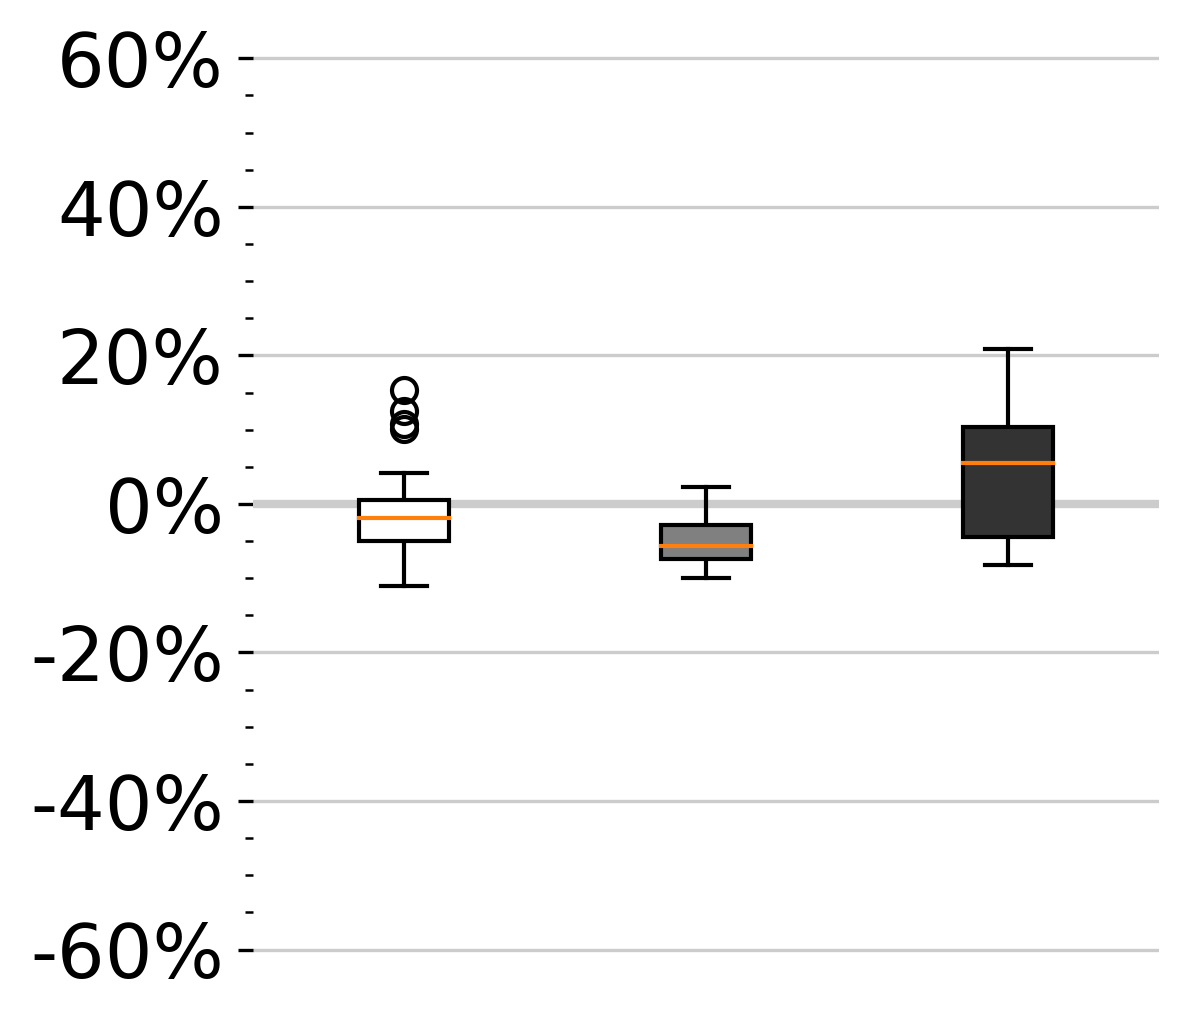

In [45]:
## Statistic to box plot
statistic = 'std-star_residual'

## Mean over lat/lon regions
data1 = (ds_stats[statistic]*100).sel(lat=slice(35,90)).mean(['lat', 'lon'])
data2 = (ds_stats[statistic]*100).sel(lat=slice(-35,35)).mean(['lat', 'lon'])
data3 = (ds_stats[statistic]*100).sel(lat=slice(-90,-35)).mean(['lat', 'lon'])

## Put data into list
data = [data1, data2, data3]


####################################################################################

#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

ax.plot([0.5, 3.5],[0,0],color=[0.8,0.8,0.8], linewidth=2)

box = ax.boxplot(data, patch_artist=True)

#box = plt.boxplot(df, patch_artist=True)
 
colors = [[1,1,1], [0.5,0.5,0.5], [0.2,0.2,0.2]]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
#ax.set_xticklabels([r'>35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'35$\hspace{-0.2}^\circ \hspace{-0.2}$S-35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'<35$\hspace{-0.2}^\circ \hspace{-0.2}$S'], fontsize=12)

ax.set_xticklabels([r'', r'', r''])

ax.set_ylim([-61, 61])
ax.set_yticks(np.arange(-60, 70, 20))
ax.set_yticklabels([f'-60%', f'-40%', f'-20%', f'0%', f'20%', f'40%', f'60%'], fontsize=18)

# Turn on the minor ticks
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
ax.tick_params(axis='x', which='both', length=0)

### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
#ax.set_ylabel(f'$\sigma^*$')

## Decadal var

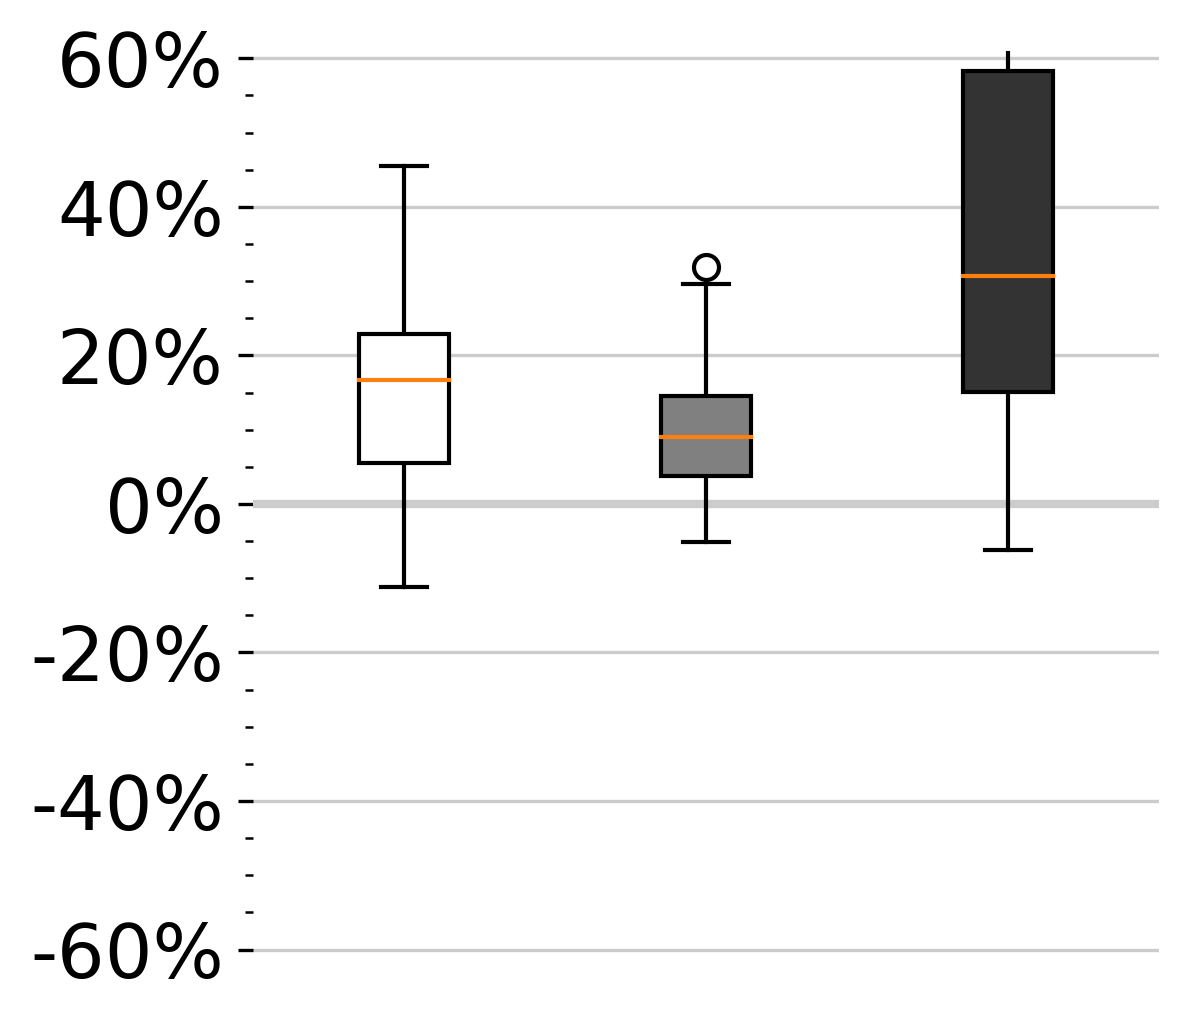

In [62]:
## Statistic to box plot
statistic = 'std-star_dec'

## Mean over lat/lon regions
data1 = (ds_stats[statistic]*100).sel(lat=slice(35,90)).mean(['lat', 'lon'])
data2 = (ds_stats[statistic]*100).sel(lat=slice(-35,35)).mean(['lat', 'lon'])
data3 = (ds_stats[statistic]*100).sel(lat=slice(-90,-35)).mean(['lat', 'lon'])

## Put data into list
data = [data1, data2, data3]


####################################################################################

#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.plot([0.5, 3.5],[0,0],color=[0.8,0.8,0.8], linewidth=2)
box = ax.boxplot(data, patch_artist=True)

#box = plt.boxplot(df, patch_artist=True)
 
colors = [[1,1,1], [0.5,0.5,0.5], [0.2,0.2,0.2]]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
#ax.set_xticklabels([r'>35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'35$\hspace{-0.2}^\circ \hspace{-0.2}$S-35$\hspace{-0.2}^\circ \hspace{-0.2}$N', 
#                    r'<35$\hspace{-0.2}^\circ \hspace{-0.2}$S'], fontsize=12)

ax.set_xticklabels([r'', r'', r''])
ax.set_ylim([-61, 61])
ax.set_yticks(np.arange(-60, 70, 20))
ax.set_yticklabels([f'-60%', f'-40%', f'-20%', f'0%', f'20%', f'40%', f'60%'], fontsize=18)

# Turn on the minor ticks
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
ax.tick_params(axis='x', which='both', length=0)

### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
#ax.set_ylabel(f'$\sigma^*$')

In [18]:
data[2].to_dataframe().describe()

,std-star_dec
count,100.000000
mean,39.108226
std,31.381767
min,-6.238367
25%,15.119742
50%,30.676722
75%,58.278902
max,114.931435


In [20]:
print(f'number of members with positive decadal normalized STD : {(data[2]<0).sum().values}')

number of members with positive decadal normalized STD : 5


# Average flux

In [10]:
ds_flux = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_MODEL.nc', concat_dim='ensemble')

## Monthly

In [11]:
ds_flux['F_member_seasonal'].sel(lat=slice(35,90)).std('time').mean(['lat','lon','ensemble']).values

/home/gloege/miniconda3/envs/tensorflow/lib/python3.6/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(1.05247353)

In [12]:
ds_flux['F_member_seasonal'].sel(lat=slice(-35,35)).std('time').mean(['lat','lon','ensemble']).values

/home/gloege/miniconda3/envs/tensorflow/lib/python3.6/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(0.5414692)

In [13]:
ds_flux['F_member_seasonal'].sel(lat=slice(-90,-35)).std('time').mean(['lat','lon','ensemble']).values

/home/gloege/miniconda3/envs/tensorflow/lib/python3.6/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(0.67644274)

## Subdecadal

In [59]:
ds_flux['F_member_residual'].sel(lat=slice(35,90)).std('time').mean(['lat','lon','ensemble']).values

array(0.1942112)

In [60]:
ds_flux['F_member_subdec'].sel(lat=slice(-35,35)).std('time').mean(['lat','lon','ensemble']).values

array(0.15921769)

In [61]:
ds_flux['F_member_subdec'].sel(lat=slice(-90,-35)).std('time').mean(['lat','lon','ensemble']).values

array(0.17200942)

## Decadal

In [62]:
ds_flux['F_member_dec'].sel(lat=slice(35,90)).std('time').mean(['lat','lon','ensemble']).values

array(0.09593214)

In [63]:
ds_flux['F_member_dec'].sel(lat=slice(-35,35)).std('time').mean(['lat','lon','ensemble']).values

array(0.06977018)

In [64]:
ds_flux['F_member_dec'].sel(lat=slice(-90,-35)).std('time').mean(['lat','lon','ensemble']).values

array(0.07813442)

# Across models

In [5]:
ds_stats_CESM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_stats/stats_FCO2_CESM*_SOMFFN.nc', concat_dim='ensemble')
ds_stats_CANESM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_stats/stats_FCO2_CanESM*_SOMFFN.nc', concat_dim='ensemble')
ds_stats_GFDL = xr.open_mfdataset(f'{dir_clean}/CO2_flux_stats/stats_FCO2_GFDL*_SOMFFN.nc', concat_dim='ensemble')
ds_stats_MPI = xr.open_mfdataset(f'{dir_clean}/CO2_flux_stats/stats_FCO2_MPI*_SOMFFN.nc', concat_dim='ensemble')

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=Tru

## Normalized STD decadal

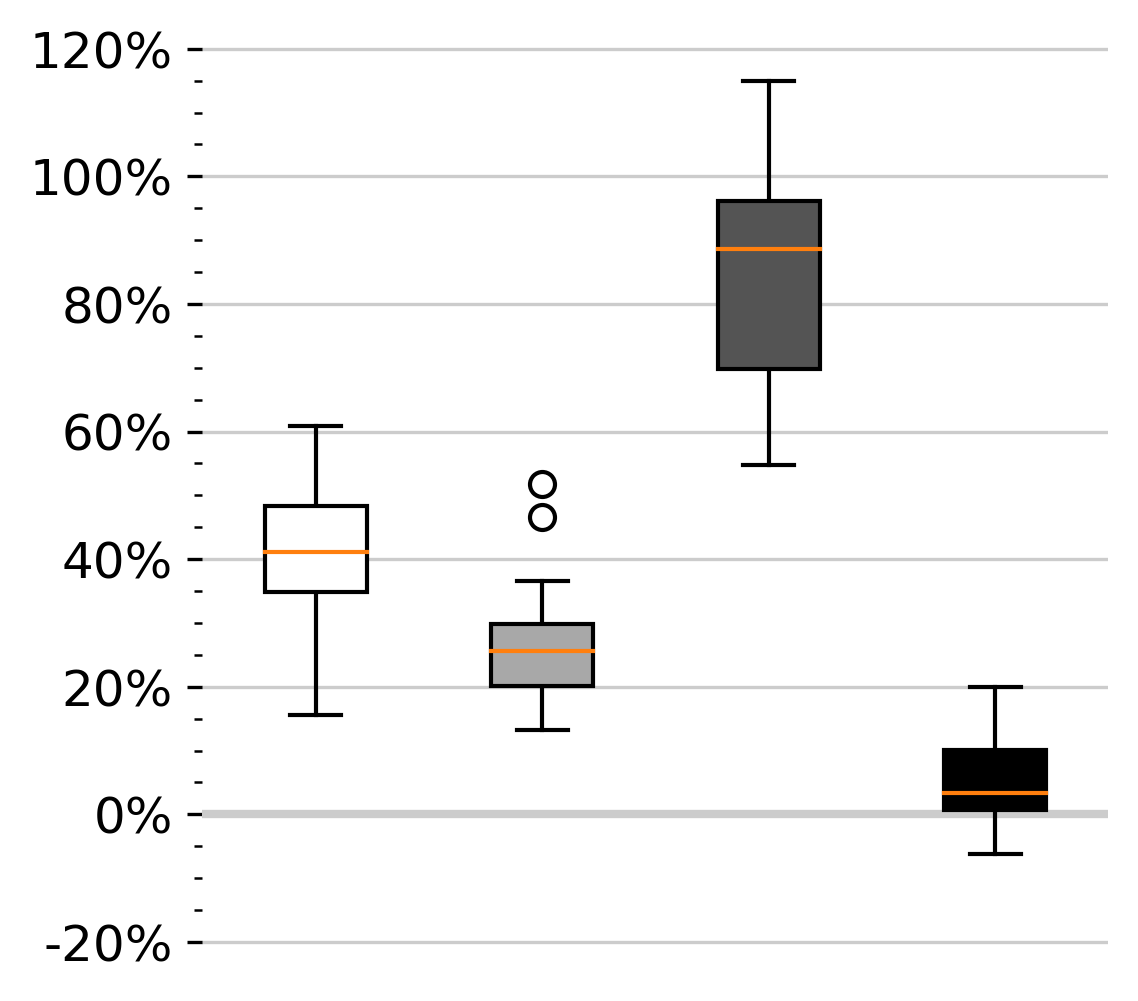

In [22]:
## Statistic to box plot
statistic = 'std-star_dec'
lat_range = [-90, -35]
## Mean over lat/lon regions

data1 = (ds_stats_CESM[statistic]*100).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data2 = (ds_stats_CANESM[statistic]*100).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data3 = (ds_stats_GFDL[statistic]*100).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data4 = (ds_stats_MPI[statistic]*100).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])

## Put data into list
data = [data1, data2, data3, data4]


####################################################################################

#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.plot([0.5, 4.5],[0,0],color=[0.8,0.8,0.8], linewidth=2)
box = ax.boxplot(data, patch_artist=True)
 
colors = [[1,1,1], [0.66,0.66,0.66], [0.33, 0.33,0.33], [0.,0.,0.]]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels([r'', r'', r'', r''])
ax.set_ylim([-21, 121])
ax.set_yticks(np.arange(-20, 130, 20))
ax.set_yticklabels([f'-20%', f'0%', f'20%', f'40%', f'60%',  f'80%',  f'100%',  f'120%'], fontsize=12)

# Turn on the minor ticks
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
ax.tick_params(axis='x', which='both', length=0)

### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
#ax.set_ylabel(f'$\sigma^*$')

# Normalized STD Seasonal

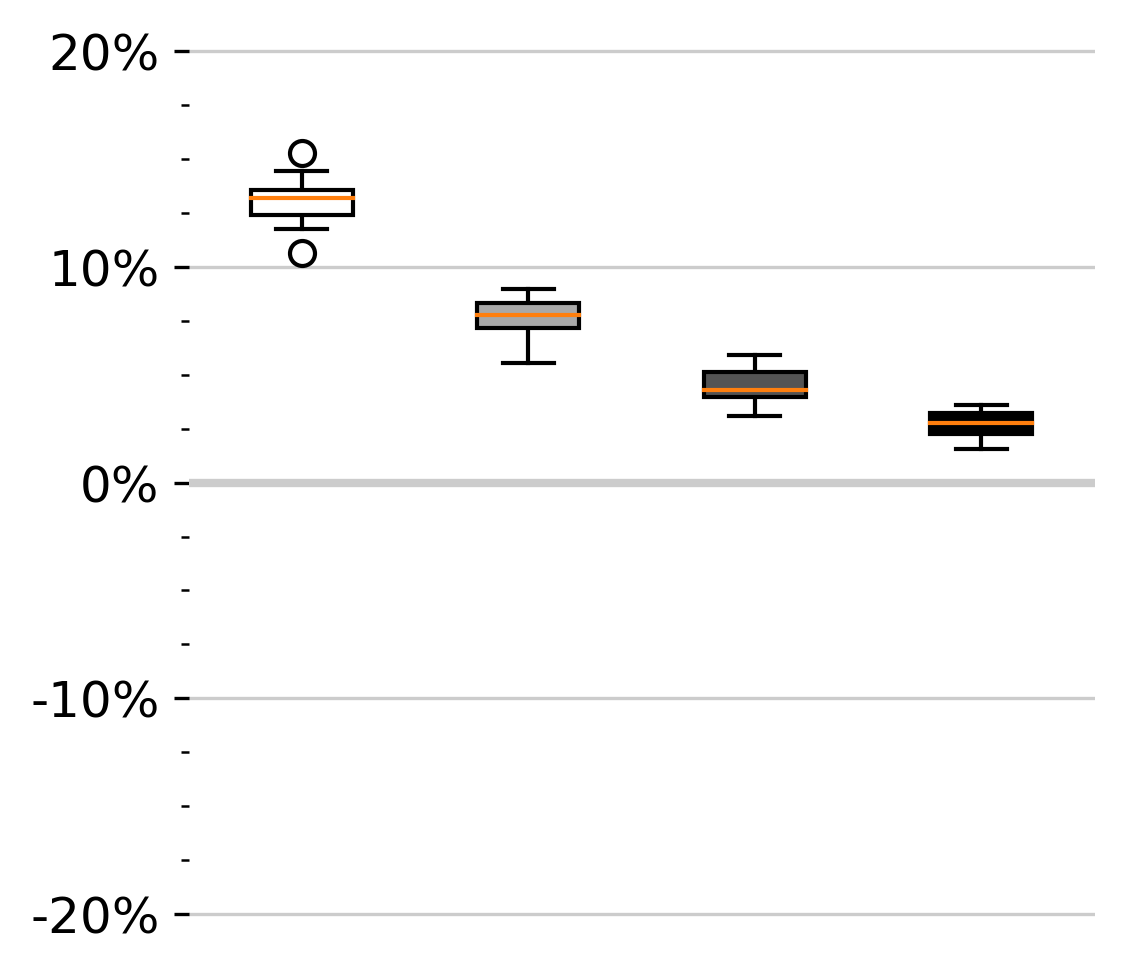

In [21]:
## Statistic to box plot
statistic = 'std-star_seasonal'
lat_range = [-90, 90]
## Mean over lat/lon regions

data1 = (ds_stats_CESM[statistic]*100).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data2 = (ds_stats_CANESM[statistic]*100).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data3 = (ds_stats_GFDL[statistic]*100).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data4 = (ds_stats_MPI[statistic]*100).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])

## Put data into list
data = [data1, data2, data3, data4]


####################################################################################

#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.plot([0.5, 4.5],[0,0],color=[0.8,0.8,0.8], linewidth=2)
box = ax.boxplot(data, patch_artist=True)
 
colors = [[1,1,1], [0.66,0.66,0.66], [0.33, 0.33,0.33], [0.,0.,0.]]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels([r'', r'', r'', r''])
ax.set_ylim([-21, 21])
ax.set_yticks(np.arange(-20, 21, 10))
ax.set_yticklabels([f'-20%', f'-10%', f'0%', f'10%', f'20%',], fontsize=12)

# Turn on the minor ticks
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
ax.tick_params(axis='x', which='both', length=0)

### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
#ax.set_ylabel(f'$\sigma^*$')

## Bias

In [30]:
ds_stats

<xarray.Dataset>
Dimensions:                 (ensemble: 100, lat: 180, lon: 360)
Coordinates:
  * lat                     (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                     (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
Dimensions without coordinates: ensemble
Data variables:
    bias                    (ensemble, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    bias_detrend            (ensemble, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    bias_dec                (ensemble, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    bias_seasonal           (ensemble, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    bias_residual           (ensemble, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    bias_residual_low       (ensemble, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    aae                     (e

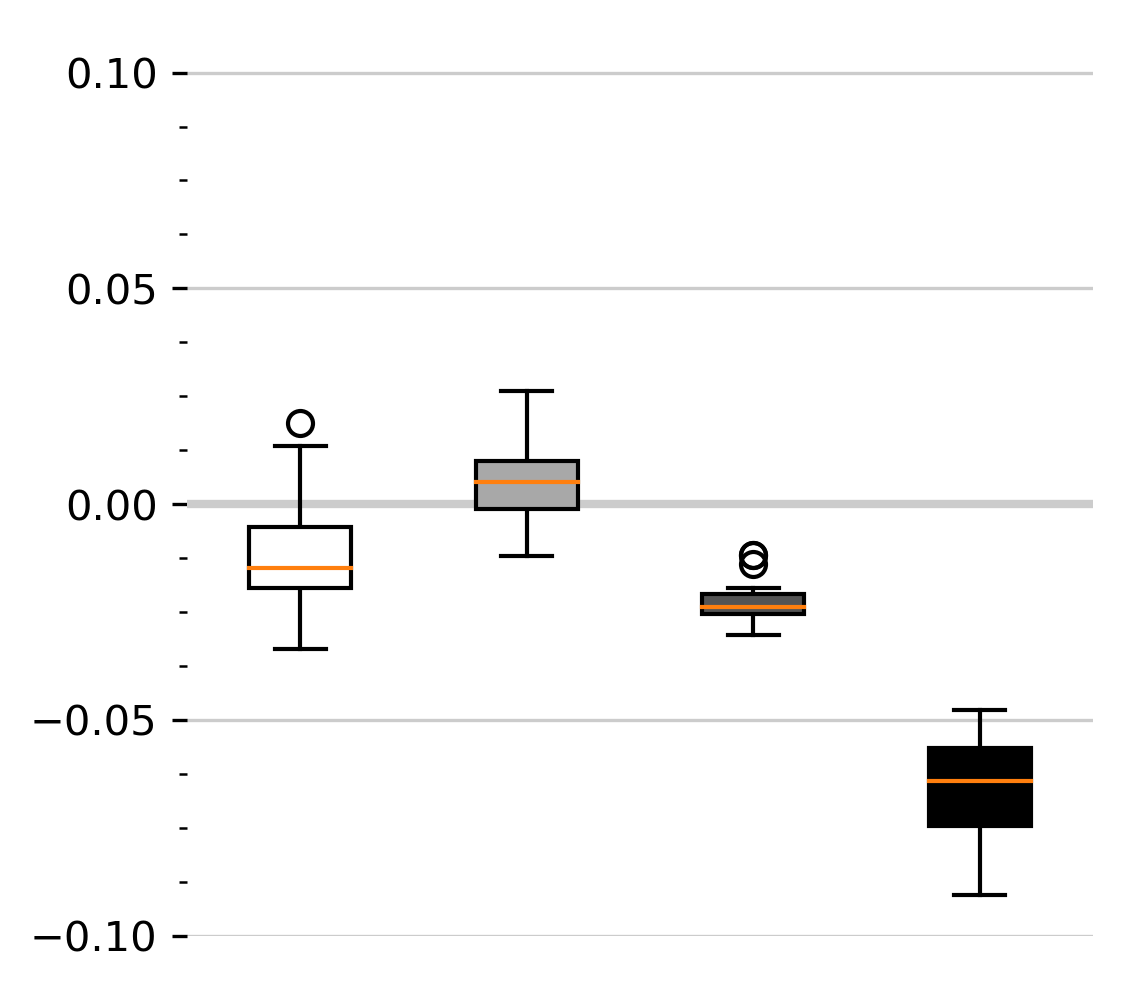

In [29]:
## Statistic to box plot
statistic = 'bias'
lat_range = [-90, 90]
## Mean over lat/lon regions

data1 = (ds_stats_CESM[statistic]).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data2 = (ds_stats_CANESM[statistic]).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data3 = (ds_stats_GFDL[statistic]).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data4 = (ds_stats_MPI[statistic]).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])

## Put data into list
data = [data1, data2, data3, data4]


####################################################################################

#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.plot([0.5, 4.5],[0,0],color=[0.8,0.8,0.8], linewidth=2)
box = ax.boxplot(data, patch_artist=True)
 
colors = [[1,1,1], [0.66,0.66,0.66], [0.33, 0.33,0.33], [0.,0.,0.]]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels([r'', r'', r'', r''])
ax.set_ylim([-0.1, 0.11])
ax.set_yticks(np.arange(-0.1, 0.11, 0.05))
#ax.set_yticklabels([f'-20%', f'-10%', f'0%', f'10%', f'20%',], fontsize=12)

# Turn on the minor ticks
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
ax.tick_params(axis='x', which='both', length=0)

### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
#ax.set_ylabel(f'$\sigma^*$')

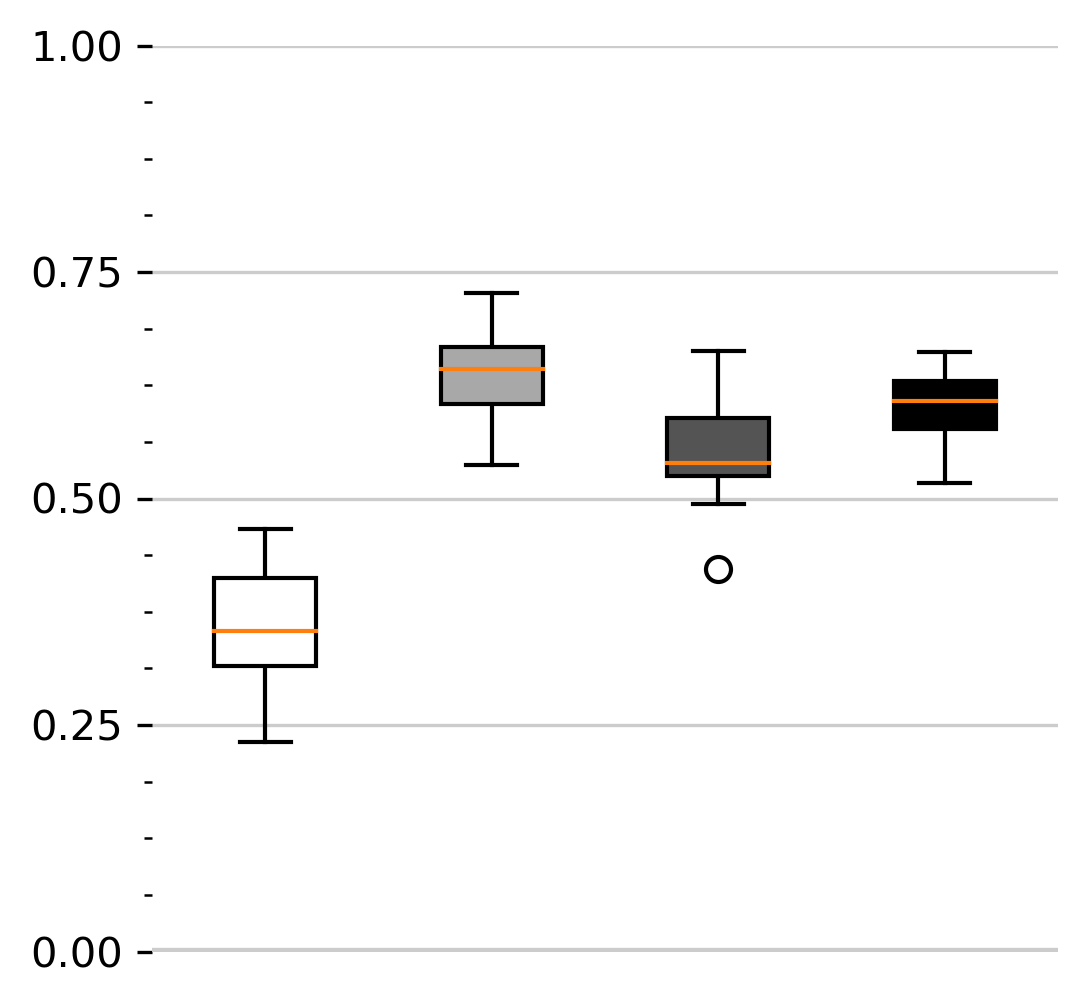

In [35]:
## Statistic to box plot
statistic = 'corr_dec'
lat_range = [-90, -35]
## Mean over lat/lon regions

data1 = (ds_stats_CESM[statistic]).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data2 = (ds_stats_CANESM[statistic]).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data3 = (ds_stats_GFDL[statistic]).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])
data4 = (ds_stats_MPI[statistic]).sel(lat=slice(lat_range[0], lat_range[1])).mean(['lat', 'lon'])

## Put data into list
data = [data1, data2, data3, data4]


####################################################################################

#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.plot([0.5, 4.5],[0,0],color=[0.8,0.8,0.8], linewidth=2)
box = ax.boxplot(data, patch_artist=True)
 
colors = [[1,1,1], [0.66,0.66,0.66], [0.33, 0.33,0.33], [0.,0.,0.]]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels([r'', r'', r'', r''])
ax.set_ylim([0, 1])
ax.set_yticks(np.arange(0, 1.1, 0.25))
#ax.set_yticklabels([f'-20%', f'-10%', f'0%', f'10%', f'20%',], fontsize=12)

# Turn on the minor ticks
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
ax.tick_params(axis='x', which='both', length=0)

### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
#ax.set_ylabel(f'$\sigma^*$')